In [1]:
import numpy as np
import pandas as pd
from datetime import date, time, datetime, timedelta
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from math import sin, cos, pi

In [2]:
df=pd.read_csv('../data/LA.csv')
df["start_time"] = pd.to_datetime(df['start_time'])
df["end_time"] = pd.to_datetime(df['end_time'] ) 
df["trip_duration"] = pd.to_timedelta(df.trip_duration)
df.head()

,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name,trip_duration,trip_duration_in_hours
0,2018-01-01 00:04:00,2018-01-01 00:25:00,3063,3018,5889,Walk-up,Pershing Square,Grand & Olympic,0 days 00:21:00,0.350000
1,2018-01-01 00:05:00,2018-01-01 00:25:00,3063,3018,6311,Walk-up,Pershing Square,Grand & Olympic,0 days 00:20:00,0.333333
2,2018-01-01 00:06:00,2018-01-01 00:25:00,3063,3018,5753,Walk-up,Pershing Square,Grand & Olympic,0 days 00:19:00,0.316667
3,2018-01-01 00:13:00,2018-01-01 00:35:00,3018,3031,6220,Monthly Pass,Grand & Olympic,7th & Spring,0 days 00:22:00,0.366667
4,2018-01-01 00:14:00,2018-01-01 00:59:00,4204,4216,12436,Monthly Pass,Washington & Abbot Kinney,17th St / SMC E Line Station,0 days 00:45:00,0.750000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306863 entries, 0 to 306862
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype          
---  ------                  --------------   -----          
 0   start_time              306863 non-null  datetime64[ns] 
 1   end_time                306863 non-null  datetime64[ns] 
 2   start_station_id        306863 non-null  int64          
 3   end_station_id          306863 non-null  int64          
 4   bike_id                 306863 non-null  int64          
 5   user_type               306863 non-null  object         
 6   start_station_name      306863 non-null  object         
 7   end_station_name        306863 non-null  object         
 8   trip_duration           306863 non-null  timedelta64[ns]
 9   trip_duration_in_hours  306863 non-null  float64        
dtypes: datetime64[ns](2), float64(1), int64(3), object(3), timedelta64[ns](1)
memory usage: 23.4+ MB


In [4]:
df_sin_cos=df[["start_time","trip_duration_in_hours"]].copy()
df_sin_cos.loc[:,"hour"]= df_sin_cos.start_time.apply(lambda x: (x.hour)+(x.minute/60))
df_sin_cos.loc[:,"day_of_week"] = df_sin_cos.start_time.apply(lambda x: x.day_of_week)
df_sin_cos

,start_time,trip_duration_in_hours,hour,day_of_week
0,2018-01-01 00:04:00,0.350000,0.066667,0
1,2018-01-01 00:05:00,0.333333,0.083333,0
2,2018-01-01 00:06:00,0.316667,0.100000,0
3,2018-01-01 00:13:00,0.366667,0.216667,0
4,2018-01-01 00:14:00,0.750000,0.233333,0
...,...,...,...,...
306858,2018-12-31 23:31:00,0.383333,23.516667,0
306859,2018-12-31 23:40:00,0.266667,23.666667,0
306860,2018-12-31 23:42:00,0.233333,23.700000,0
306861,2018-12-31 23:46:00,0.150000,23.766667,0


In [5]:
def create_time_feature(name, feature, df, num_of_values):
    df[name+"_sin"]= feature.apply(lambda x: sin(2*pi*(x/num_of_values)))
    df[name+"_cos"]= feature.apply(lambda x: cos(2*pi*(x/num_of_values)))

In [6]:
create_time_feature("hour", df_sin_cos.hour, df_sin_cos, 24)
create_time_feature("day_of_week", df_sin_cos.day_of_week, df_sin_cos, 7)
df_sin_cos

,start_time,trip_duration_in_hours,hour,day_of_week,hour_sin,hour_cos,day_of_week_sin,day_of_week_cos
0,2018-01-01 00:04:00,0.350000,0.066667,0,0.017452,0.999848,0.0,1.0
1,2018-01-01 00:05:00,0.333333,0.083333,0,0.021815,0.999762,0.0,1.0
2,2018-01-01 00:06:00,0.316667,0.100000,0,0.026177,0.999657,0.0,1.0
3,2018-01-01 00:13:00,0.366667,0.216667,0,0.056693,0.998392,0.0,1.0
4,2018-01-01 00:14:00,0.750000,0.233333,0,0.061049,0.998135,0.0,1.0
...,...,...,...,...,...,...,...,...
306858,2018-12-31 23:31:00,0.383333,23.516667,0,-0.126199,0.992005,0.0,1.0
306859,2018-12-31 23:40:00,0.266667,23.666667,0,-0.087156,0.996195,0.0,1.0
306860,2018-12-31 23:42:00,0.233333,23.700000,0,-0.078459,0.996917,0.0,1.0
306861,2018-12-31 23:46:00,0.150000,23.766667,0,-0.061049,0.998135,0.0,1.0


In [7]:
X_df = df_sin_cos.drop(["hour","day_of_week","start_time"], axis=1)
X_df

,trip_duration_in_hours,hour_sin,hour_cos,day_of_week_sin,day_of_week_cos
0,0.350000,0.017452,0.999848,0.0,1.0
1,0.333333,0.021815,0.999762,0.0,1.0
2,0.316667,0.026177,0.999657,0.0,1.0
3,0.366667,0.056693,0.998392,0.0,1.0
4,0.750000,0.061049,0.998135,0.0,1.0
...,...,...,...,...,...
306858,0.383333,-0.126199,0.992005,0.0,1.0
306859,0.266667,-0.087156,0.996195,0.0,1.0
306860,0.233333,-0.078459,0.996917,0.0,1.0
306861,0.150000,-0.061049,0.998135,0.0,1.0


In [8]:
scaler = StandardScaler()
scaler.fit(X_df)
X_scaled_sin_cos = scaler.transform(X_df)
X_scaled_sin_cos_df = pd.DataFrame(X_scaled_sin_cos, columns=X_df.columns, index=X_df.index)
X_scaled_sin_cos_df

,trip_duration_in_hours,hour_sin,hour_cos,day_of_week_sin,day_of_week_cos
0,-0.139620,0.571191,2.223871,0.003411,1.4169
1,-0.165073,0.578031,2.223728,0.003411,1.4169
2,-0.190526,0.584870,2.223554,0.003411,1.4169
3,-0.114167,0.632716,2.221446,0.003411,1.4169
4,0.471256,0.639545,2.221018,0.003411,1.4169
...,...,...,...,...,...
306858,-0.088714,0.345959,2.210808,0.003411,1.4169
306859,-0.266886,0.407175,2.217786,0.003411,1.4169
306860,-0.317792,0.420810,2.218990,0.003411,1.4169
306861,-0.445058,0.448108,2.221018,0.003411,1.4169


In [9]:
k_max = 20
clusters_sin_cos = []
losses_sin_cos = []

for k in range(k_max):
    model_sin_cos = KMeans(n_clusters=k+1,random_state=42,init="k-means++")
    model_sin_cos.fit(X_scaled_sin_cos)
    clusters_sin_cos.append(k+1)
    losses_sin_cos.append(model_sin_cos.inertia_)

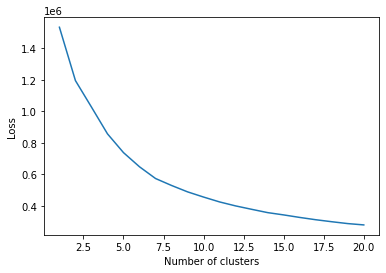

In [10]:
plt.plot(clusters_sin_cos, losses_sin_cos)
plt.ylabel("Loss")
plt.xlabel("Number of clusters")
plt.show()

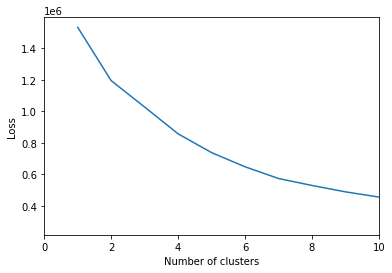

In [11]:
plt.plot(clusters_sin_cos, losses_sin_cos)
plt.ylabel("Loss")
plt.xlabel("Number of clusters")
plt.xlim([0,10])
plt.show()

In [12]:
# refit algorithm
seven_means = KMeans(n_clusters=7, random_state=42,init="k-means++")
seven_means.fit(X_scaled_sin_cos)

# refit algorithm
five_means = KMeans(n_clusters=5, random_state=42,init="k-means++")
five_means.fit(X_scaled_sin_cos)



KMeans(n_clusters=5, random_state=42)

In [13]:
numbers = ["zero", "one", "two", "three","four","five","six"]

X_scaled_sin_cos_df["cluster_seven"] = seven_means.predict(X_scaled_sin_cos)
X_scaled_sin_cos_df["cluster_seven"] = X_scaled_sin_cos_df["cluster_seven"].apply(lambda x: numbers[x])

X_scaled_sin_cos_df["cluster_five"] = five_means.predict(X_scaled_sin_cos)
X_scaled_sin_cos_df["cluster_five"] = X_scaled_sin_cos_df["cluster_five"].apply(lambda x: numbers[x])

X_scaled_sin_cos_df["duration"]= df_sin_cos.trip_duration_in_hours
X_scaled_sin_cos_df["hour"]=df_sin_cos.hour
X_scaled_sin_cos_df["day_of_week"]=df_sin_cos.day_of_week
X_scaled_sin_cos_df.reset_index(inplace=True)

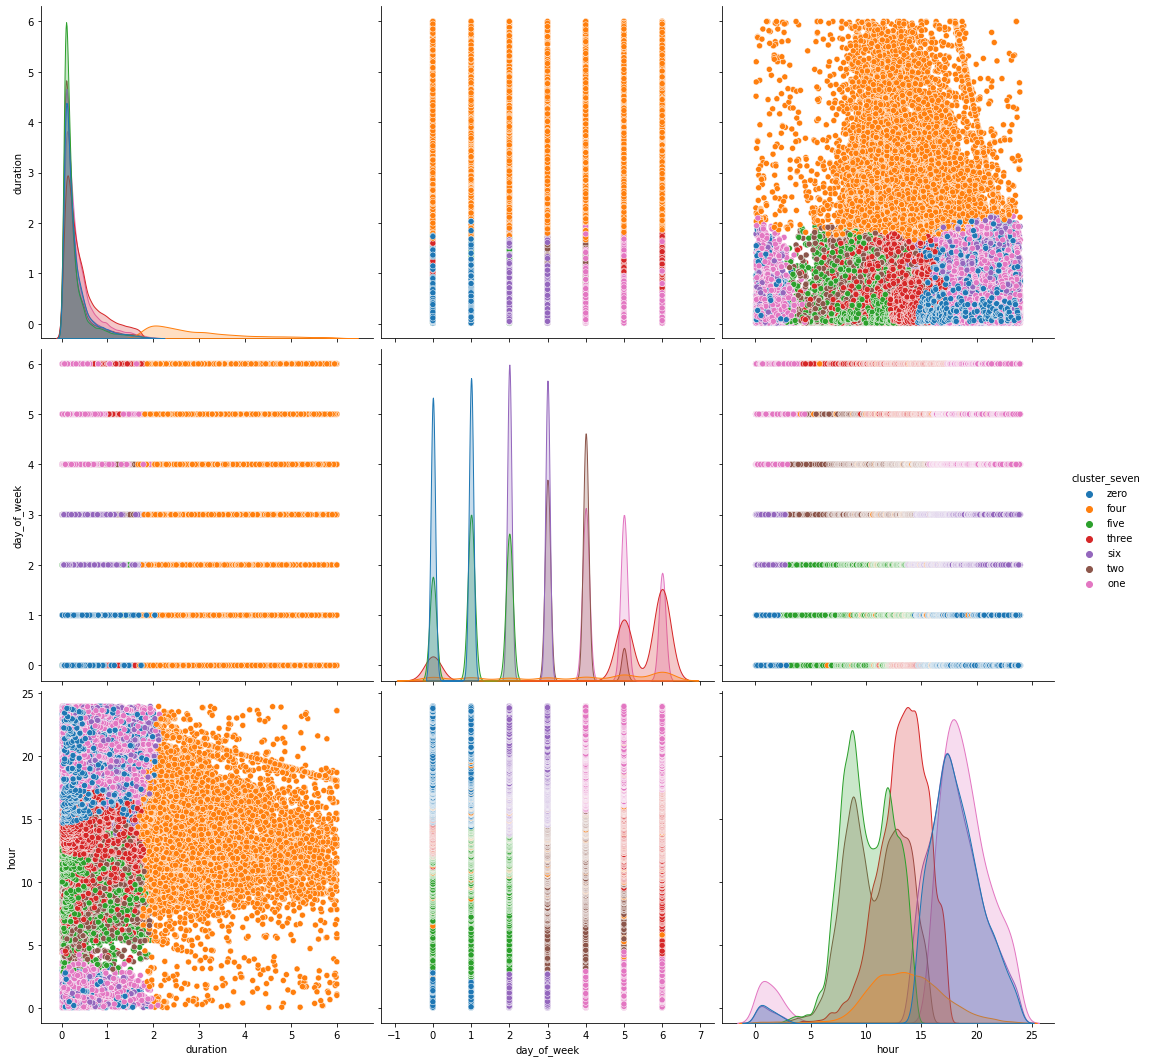

In [14]:
sns.pairplot(data=X_scaled_sin_cos_df, hue="cluster_seven",height=5, vars=["duration","day_of_week","hour"])

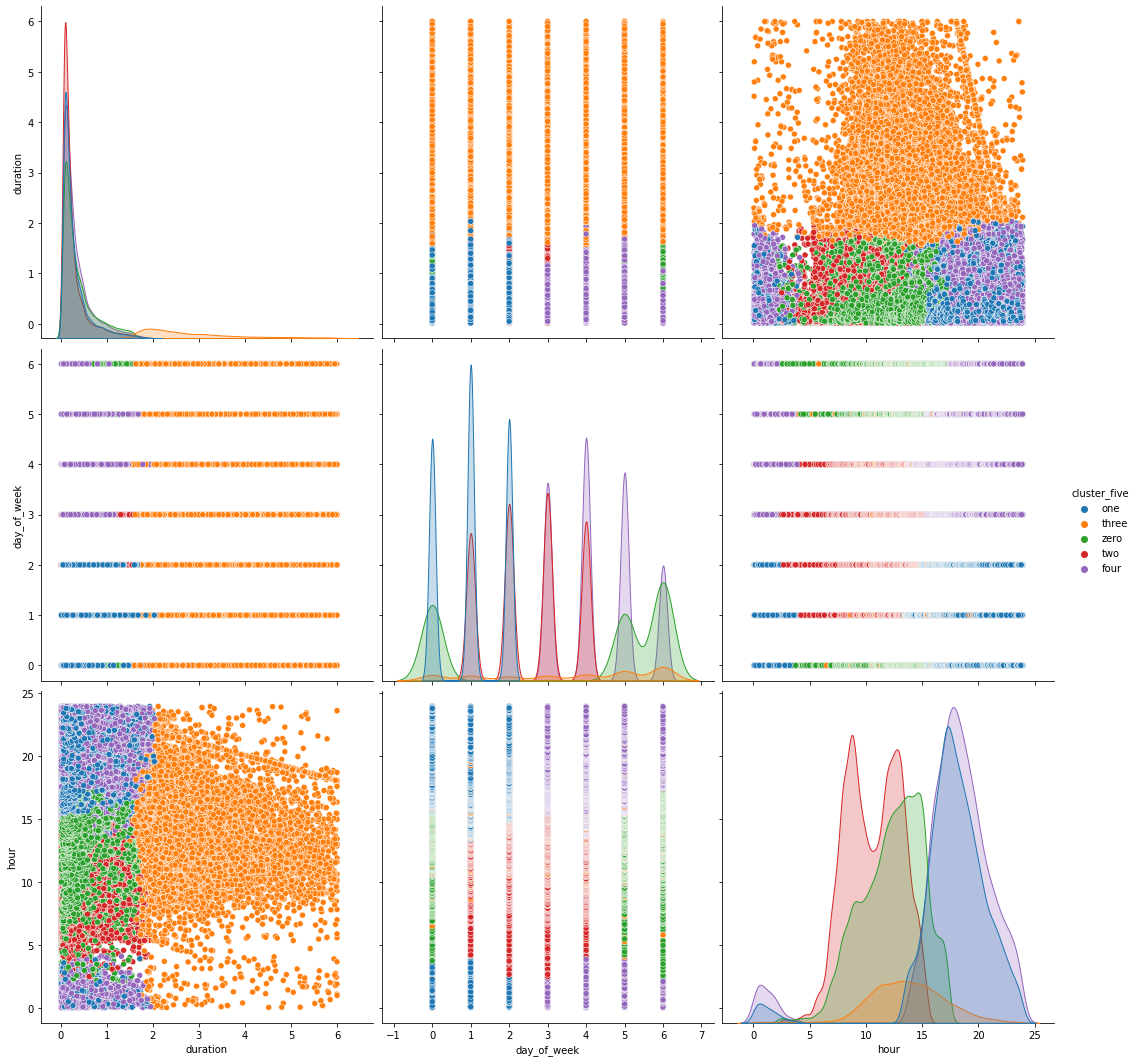

In [15]:
sns.pairplot(data=X_scaled_sin_cos_df, hue="cluster_five",height=5, vars=["duration","day_of_week","hour"])

<AxesSubplot:xlabel='hour', ylabel='Density'>

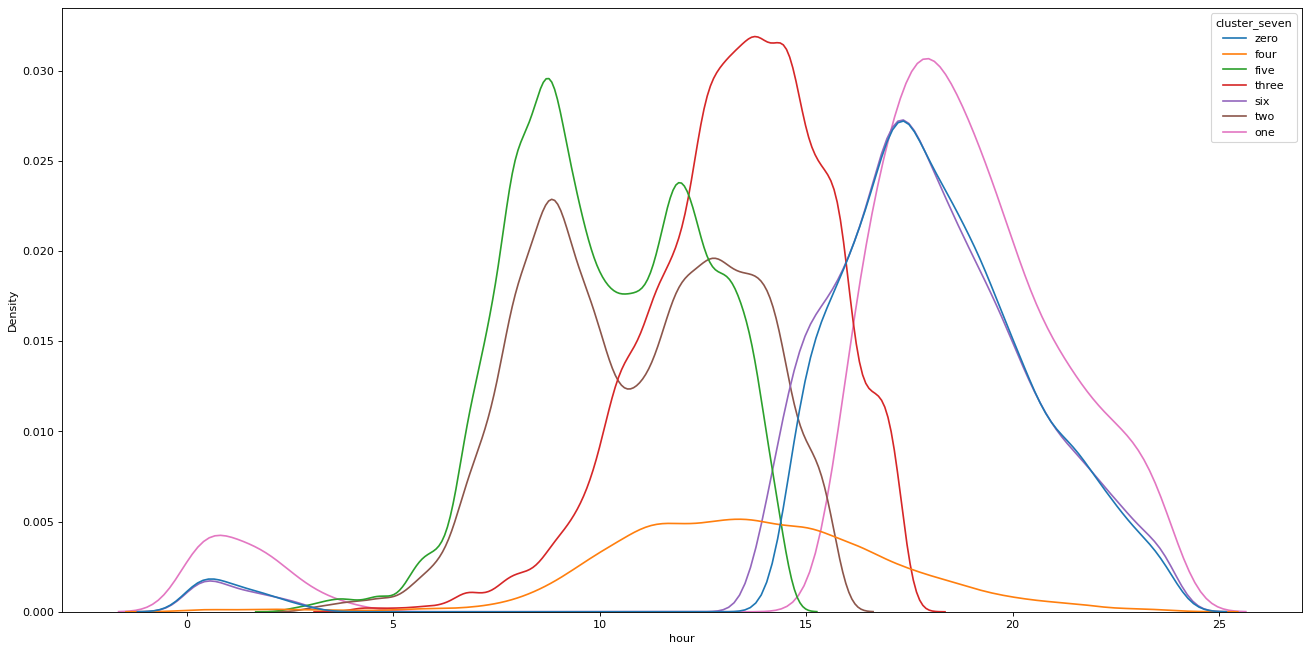

In [16]:
fig,ax = plt.subplots(figsize=(20,10), dpi= 80) 
axis_font = {'size':'20'}
label_font = {'labelsize':'12'}
dic={'fontsize': '24'}
sns.kdeplot(data=X_scaled_sin_cos_df, x="hour", hue="cluster_seven")

<AxesSubplot:xlabel='day_of_week', ylabel='Density'>

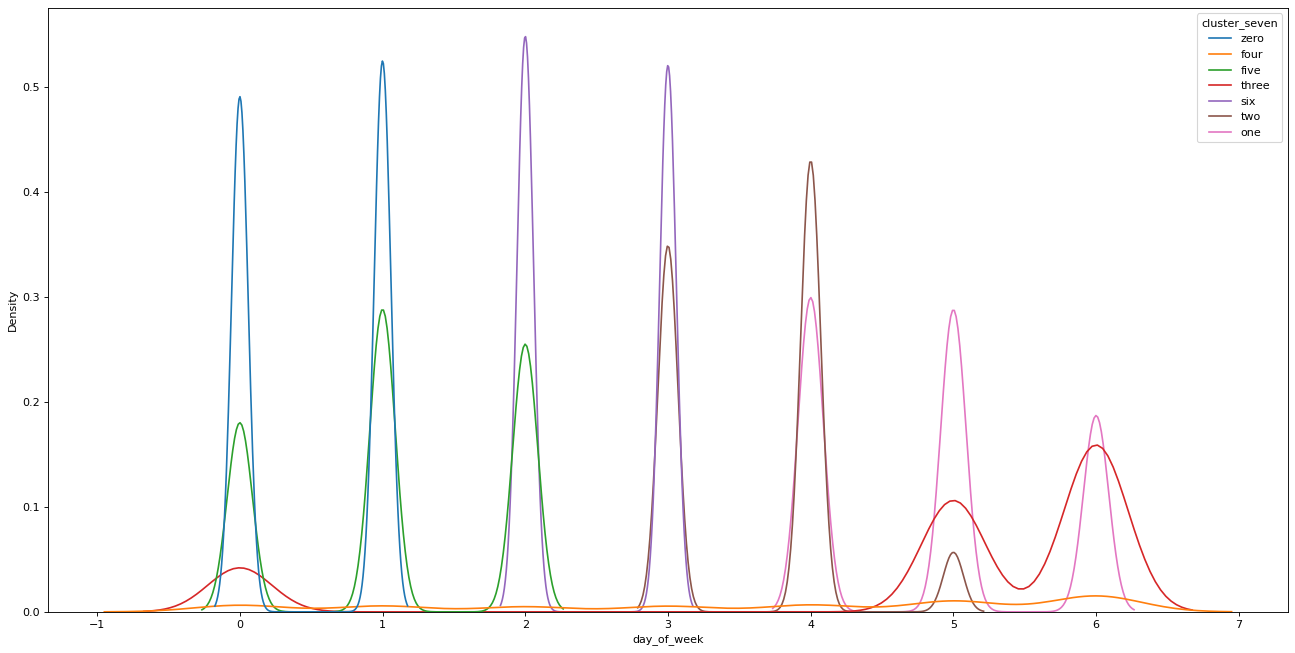

In [17]:
fig,ax = plt.subplots(figsize=(20,10), dpi= 80) 
axis_font = {'size':'20'}
label_font = {'labelsize':'12'}
dic={'fontsize': '24'}
sns.kdeplot(data=X_scaled_sin_cos_df, x="day_of_week", hue="cluster_seven")

<AxesSubplot:xlabel='duration', ylabel='Density'>

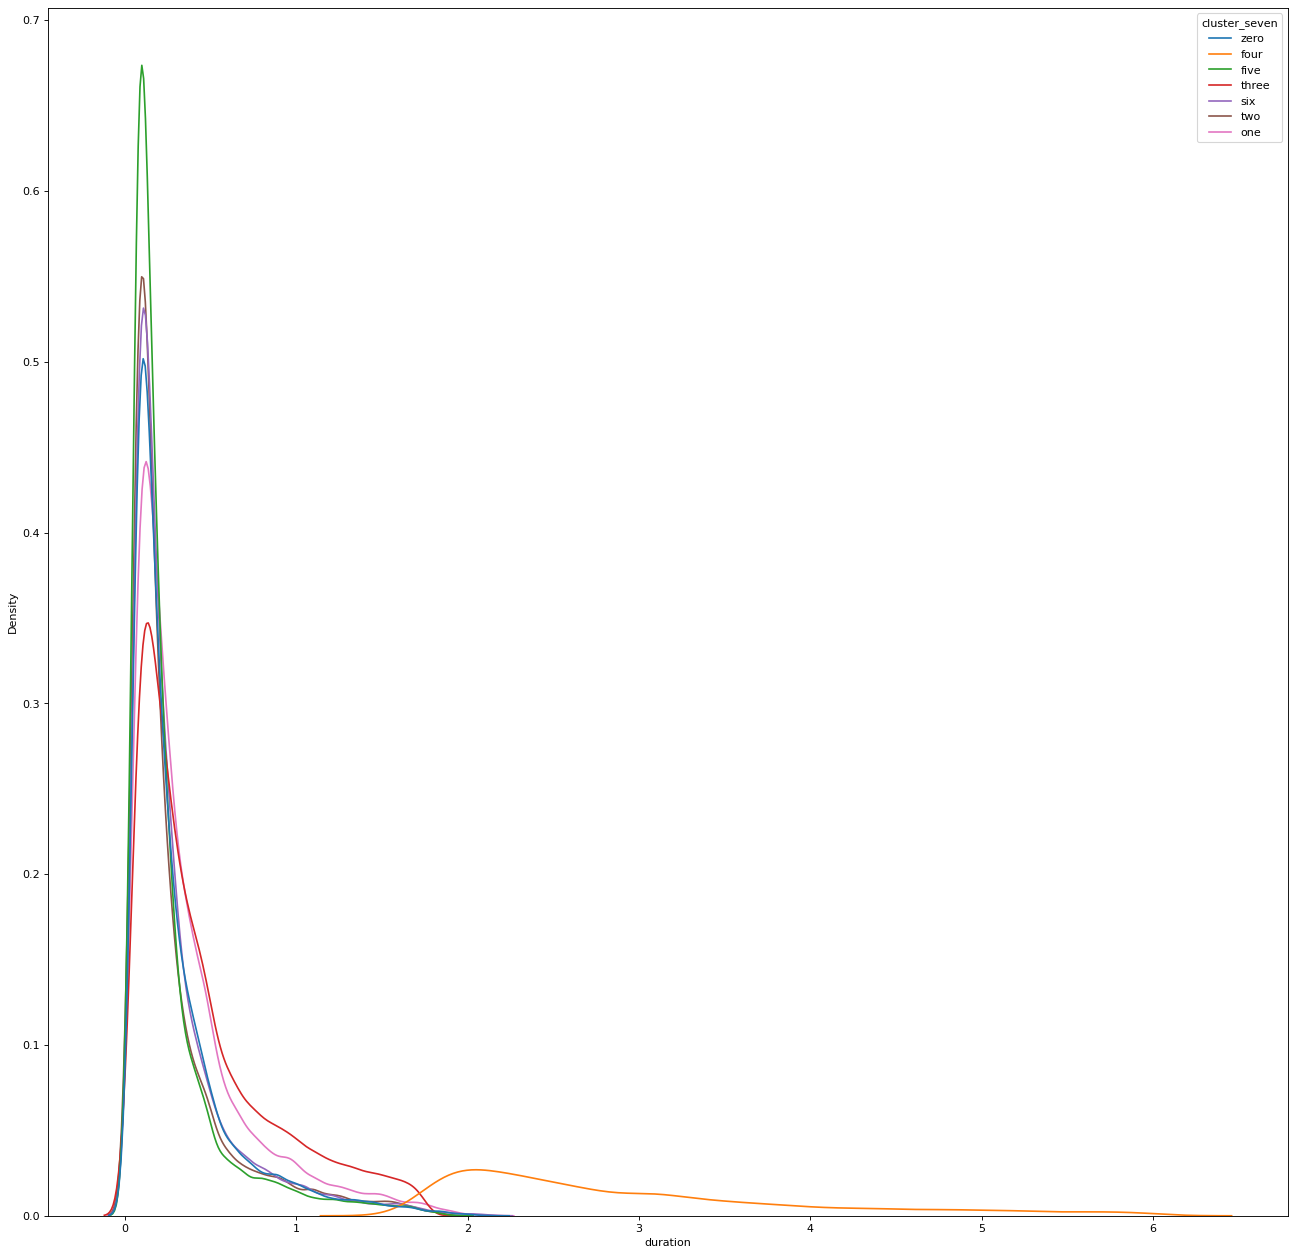

In [18]:
fig,ax = plt.subplots(figsize=(20,20), dpi= 80) 
axis_font = {'size':'20'}
label_font = {'labelsize':'12'}
dic={'fontsize': '24'}
sns.kdeplot(data=X_scaled_sin_cos_df, x="duration", hue="cluster_seven")

<AxesSubplot:xlabel='hour', ylabel='Density'>

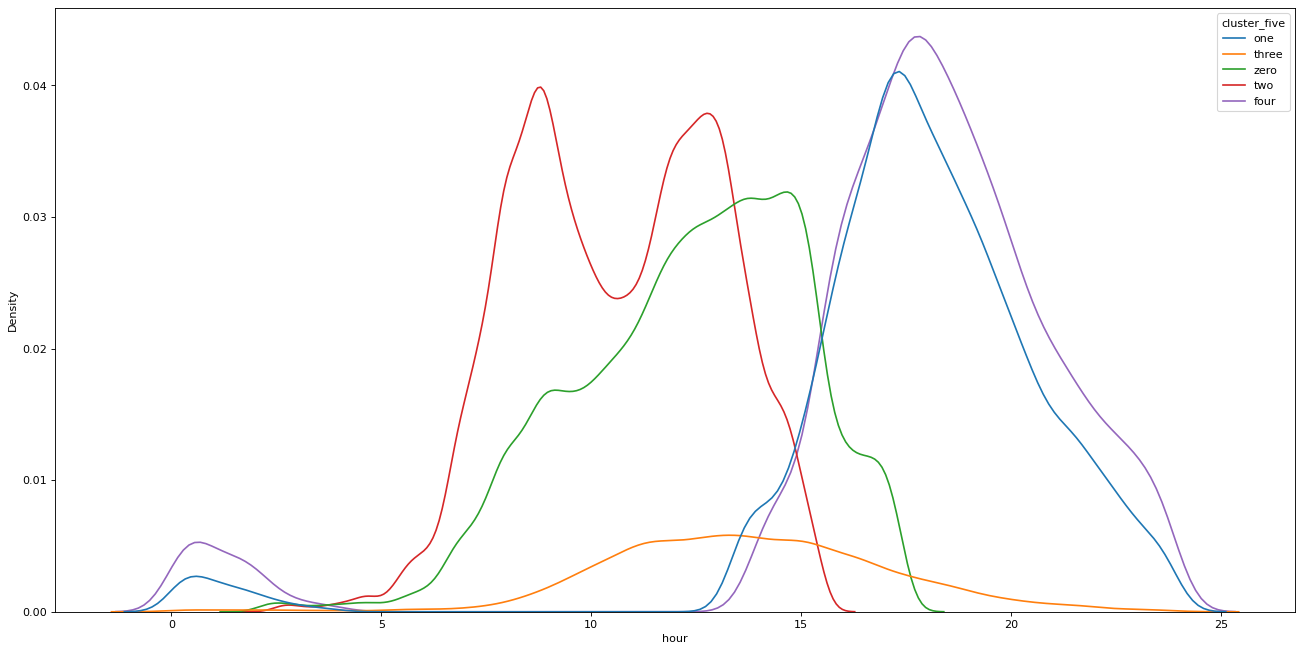

In [19]:
fig,ax = plt.subplots(figsize=(20,10), dpi= 80) 
axis_font = {'size':'20'}
label_font = {'labelsize':'12'}
dic={'fontsize': '24'}
sns.kdeplot(data=X_scaled_sin_cos_df, x="hour", hue="cluster_five")

<AxesSubplot:xlabel='day_of_week', ylabel='Density'>

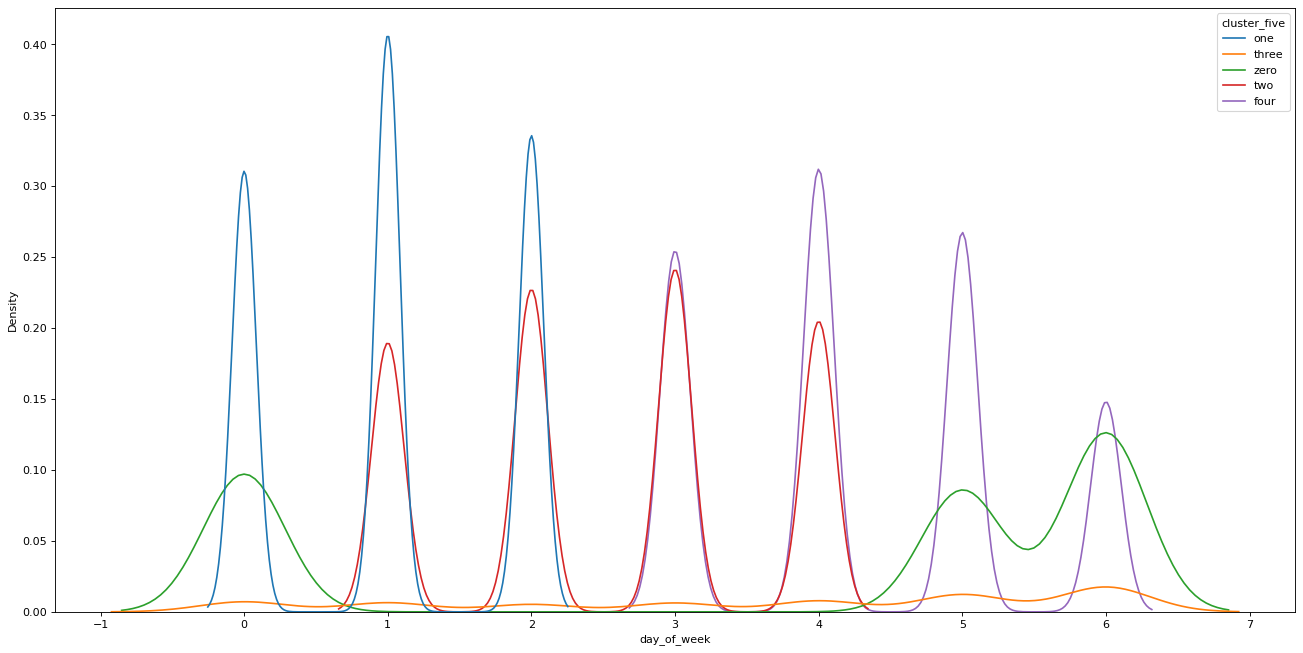

In [20]:
fig,ax = plt.subplots(figsize=(20,10), dpi= 80) 
axis_font = {'size':'20'}
label_font = {'labelsize':'12'}
dic={'fontsize': '24'}
sns.kdeplot(data=X_scaled_sin_cos_df, x="day_of_week", hue="cluster_five")

<AxesSubplot:xlabel='duration', ylabel='Density'>

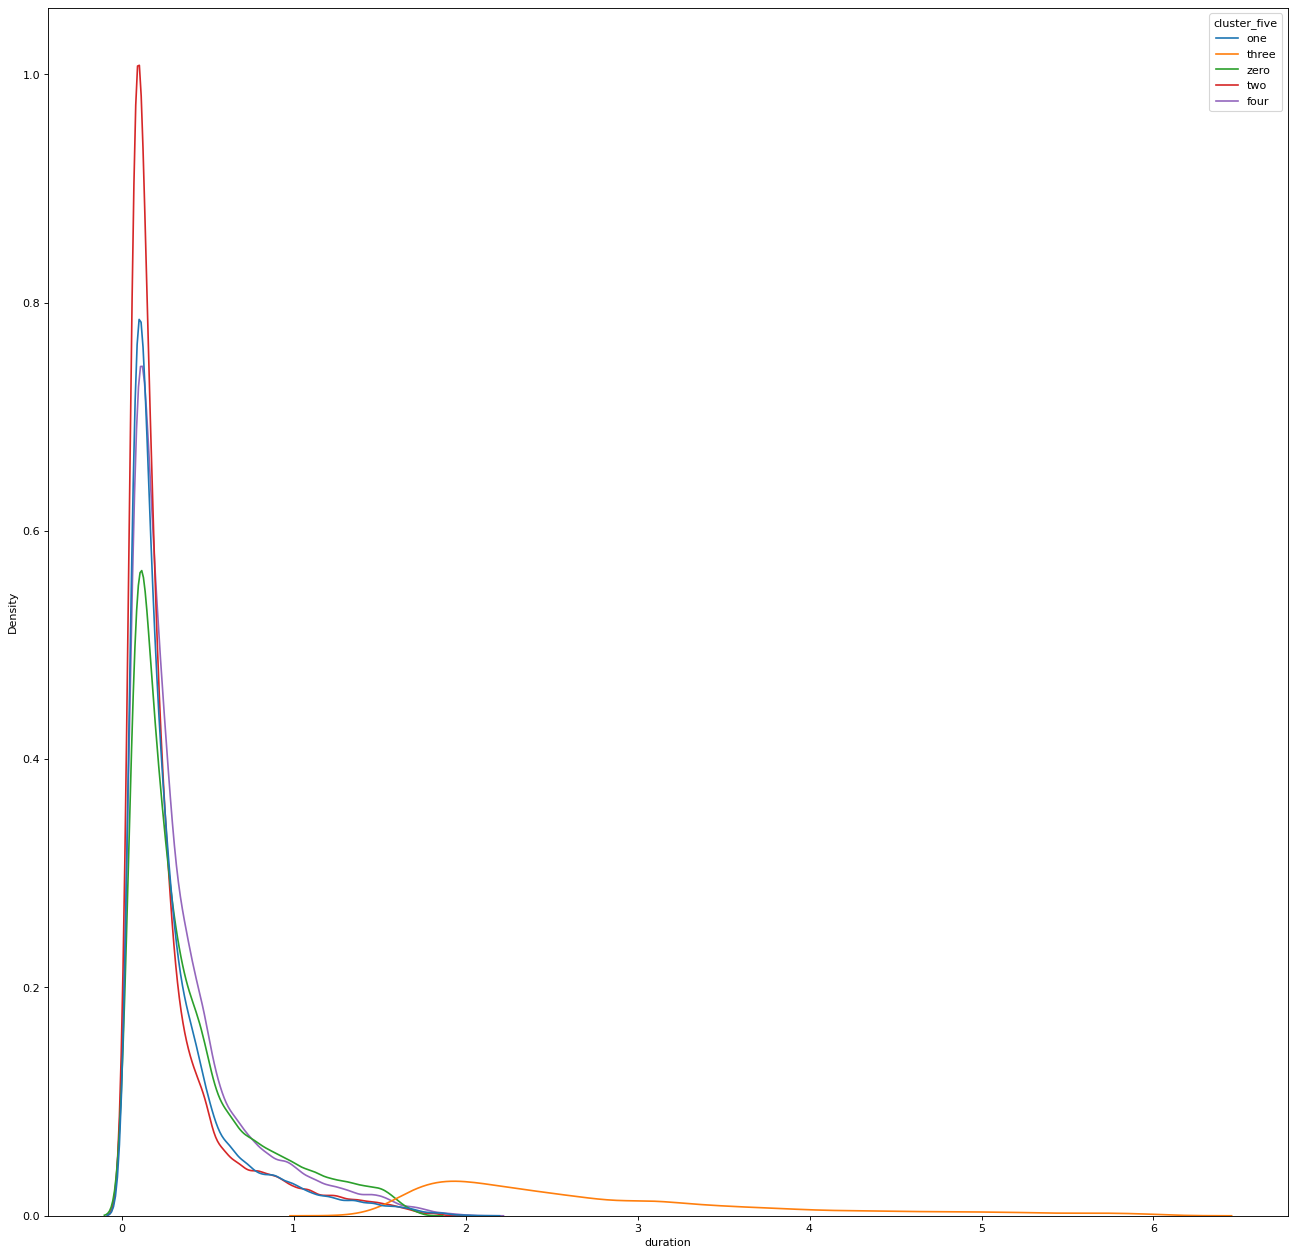

In [21]:
fig,ax = plt.subplots(figsize=(20,20), dpi= 80) 
axis_font = {'size':'20'}
label_font = {'labelsize':'12'}
dic={'fontsize': '24'}
sns.kdeplot(data=X_scaled_sin_cos_df, x="duration", hue="cluster_five")